<a href="https://colab.research.google.com/github/SDPreetham/OLA_Driver_Attrition_Prediction/blob/main/OLA_Driver_Attrition_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ola Attrition Analytics: Modelling Driver Turnover Risk**

- By S D Preetham

**Problem Description:**

* Ola faces a growing challenge in retaining its driver base amid high attrition and competition from Uber. From a business perspective, retaining drivers is significantly more cost-effective than acquiring new ones. Moreover, many new recruits are people who don’t even own cars, further adding to onboarding complexity and expense.

* Ultimately, the objective here is to develop a predictive model that uses driver demographic, performance and tenure data to identify drivers at high risk of leaving. By leaveraging these insights, Ola can take proactive retention measures, optimize resource allocation and strengthen workforce stability thereby ensuring better customer satisfaction and business sustainability.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('ola.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


### **Exploratory Data Analysis:**

In [ ]:
print('The number of datapoints: ', df.shape[0])
print('The number of features: ', df.shape[1])

The number of datapoints:  19104
The number of features:  14


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
MMM-YY,object
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Dateofjoining,object
LastWorkingDate,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0
LastWorkingDate,17488
Age,61
Gender,52


In [ ]:
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

**Insights:**

* It is observed that there are no duplicate values in the dataset.
However, there are null values present across various columns in the dataset.
* The column 'LastWorkingDate' has the highest number of null values. Other columns with null values include 'Age' and 'Gender'.

In [ ]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], format='%b-%y',errors='coerce')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format='%d/%m/%y')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], format='%d/%m/%y')


### **Visual Analysis:**

**Univariate Analysis:**

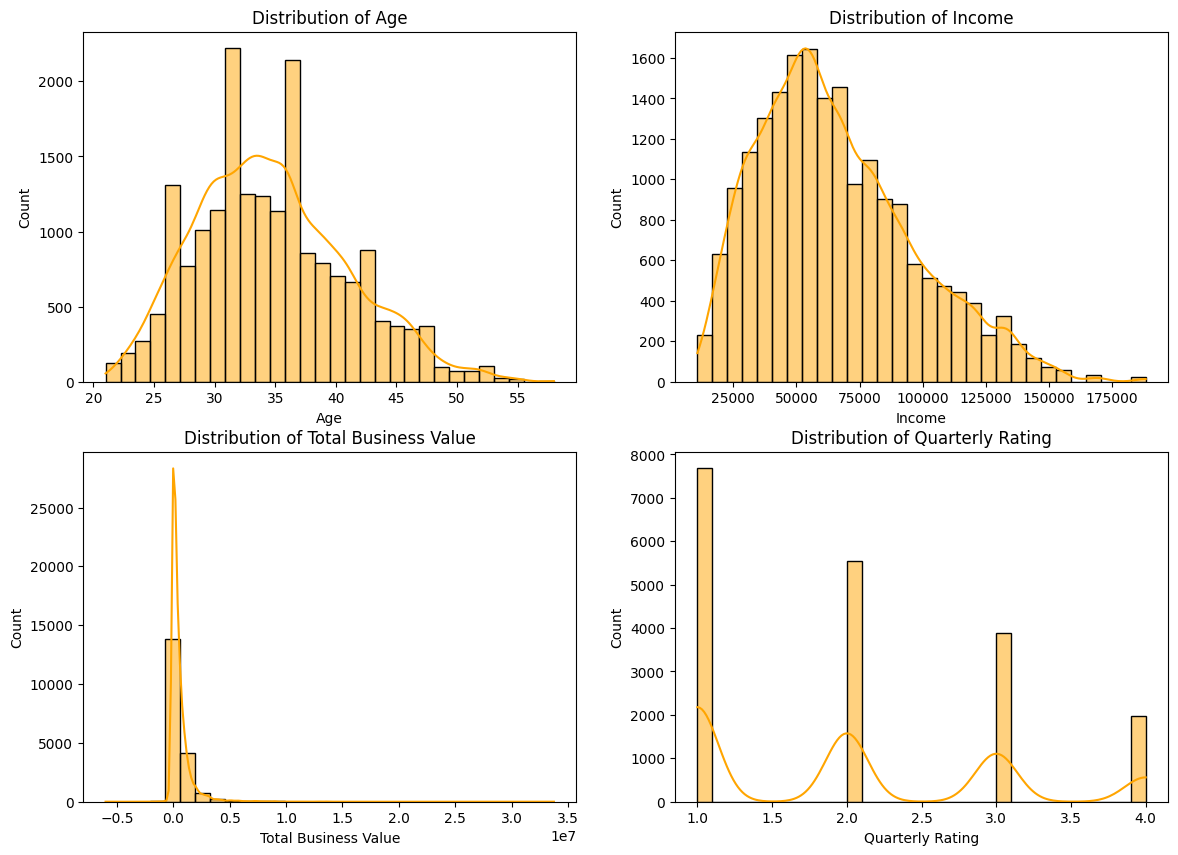

In [ ]:
continuous = ['Age', 'Income', 'Total Business Value', 'Quarterly Rating']

plt.figure(figsize=(14,10))

for i, col in enumerate(continuous):
  plt.subplot(2,2,i+1)
  sns.histplot(df[col], kde = True, bins = 30, color='orange')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')

plt.show()

**Insights:**

* From the age countplot, it is evident that most of the drivers are aged between 30-37.
* It is evident from income distribution that most of the drivers are paid a salary ranging between 30000-70000.
* The business value brought by drivers is minimal.
*  Many drivers receive low performance ratings, which could lead to attrition.

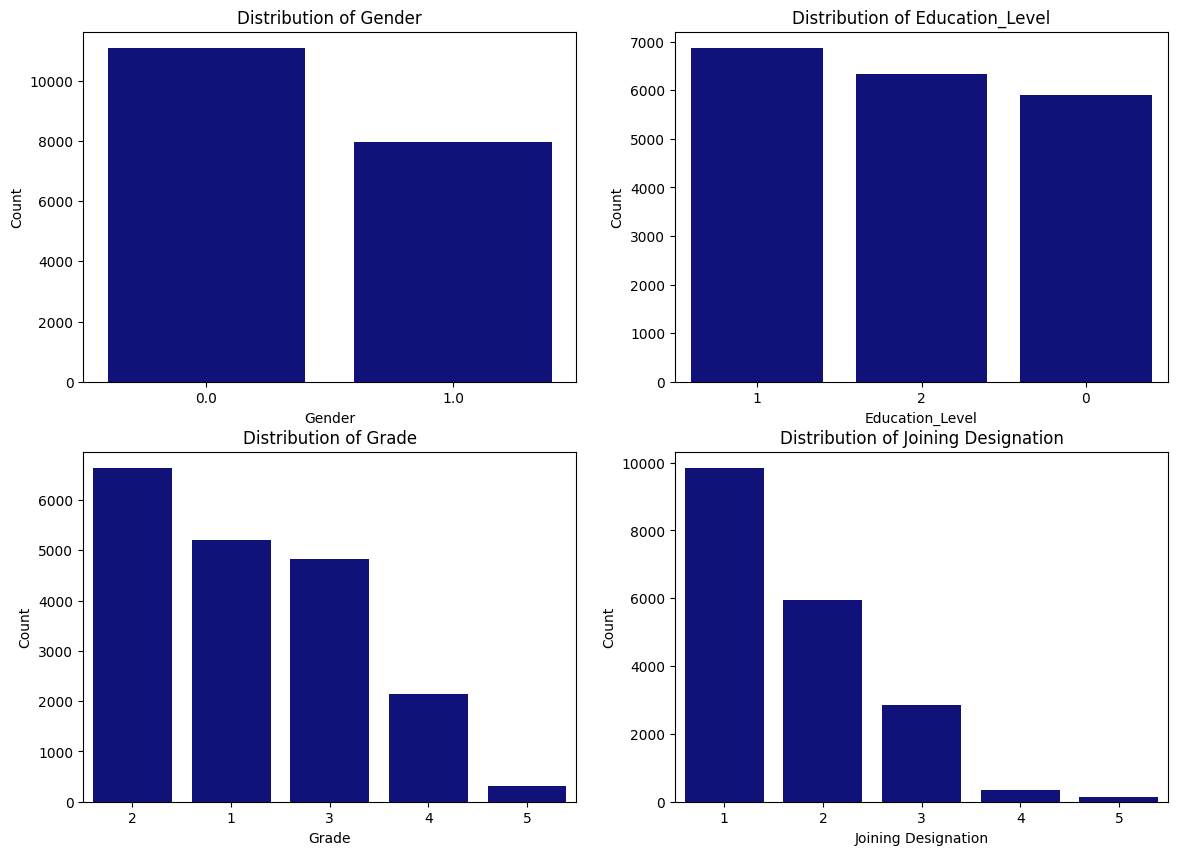

In [ ]:
categorical = ['Gender','Education_Level','Grade','Joining Designation']

plt.figure(figsize=(14,10))

for i,col in enumerate(categorical):
  plt.subplot(2,2,i+1)
  sns.countplot(data=df, x=col, color='darkblue', order=df[col].value_counts().index)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')

plt.show()

**Insights:**
* Out of the 19104 drivers, over 10000 drivers are male, indicating a high number of male drivers at Ola.
* Ola's driver base consists of a mix of drivers with different education levels.
* The grade of a majority of drivers ranges between 1-3 indicating that the workforce is primarily made up of entry to mid-level drivers. Promotions or grade growth could be a lever for retention or motivation.
* The joining designation also mostly ranges between 1-3.

**Bivariate Analysis:**

* Analyzing attrition rates across each continuous variable:

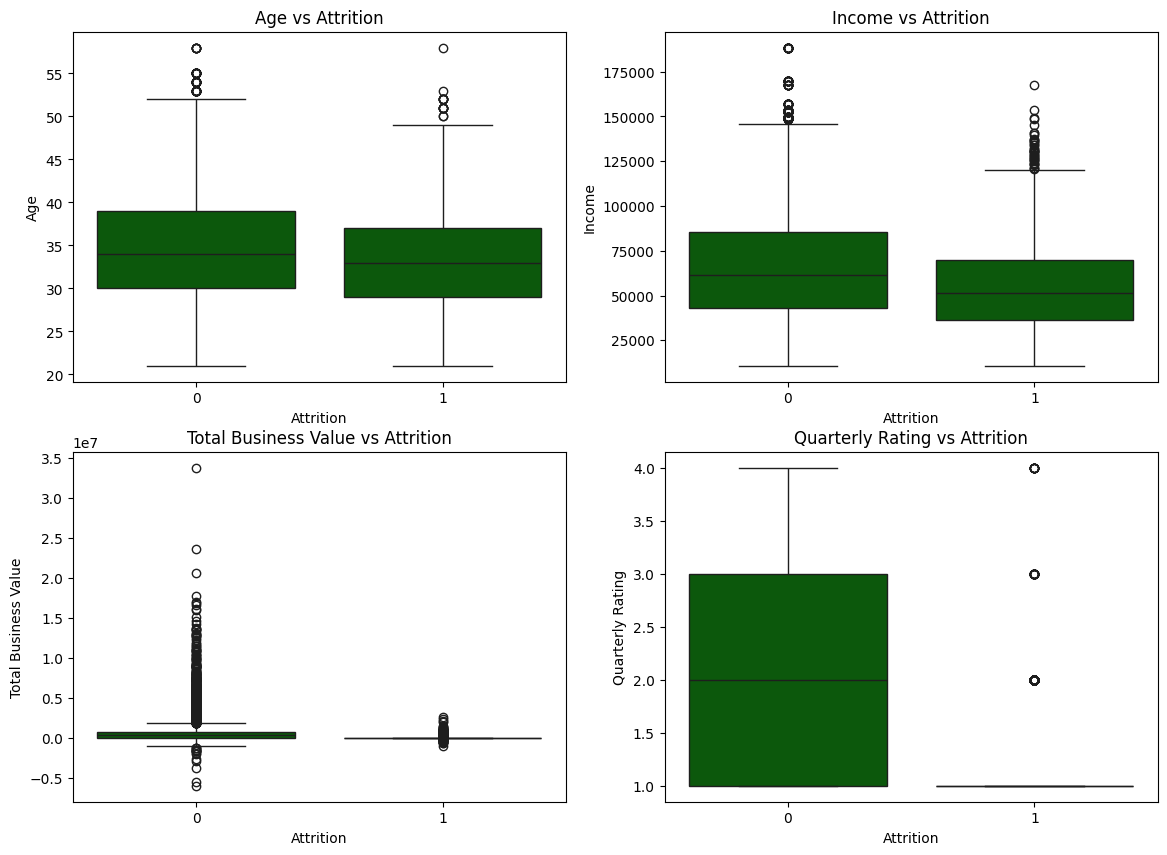

In [ ]:
df['Attrition'] = df['LastWorkingDate'].notna().astype(int)

plt.figure(figsize=(14,10))

for i, col in enumerate(continuous):
  plt.subplot(2,2,i+1)
  sns.boxplot(data=df, x= 'Attrition', y= col, color = 'darkgreen')
  plt.title(f'{col} vs Attrition')
  plt.xlabel('Attrition')
  plt.ylabel(col)


plt.show()

**Insights:**

* From the income distribution, it is evident that the attrited drivers had a lower median income(~50,000) than the retained drivers (nearly 65,000), indicating low incomes lead to driver attrition.

* The retained drivers contributed to a large range of income.

* The median quarterly rating of retained drivers is higher than that of attrited drivers.This indicates an inverse relationship between performance rating and attrition.

* **Analyzing attrition rates across each categorical variable:**

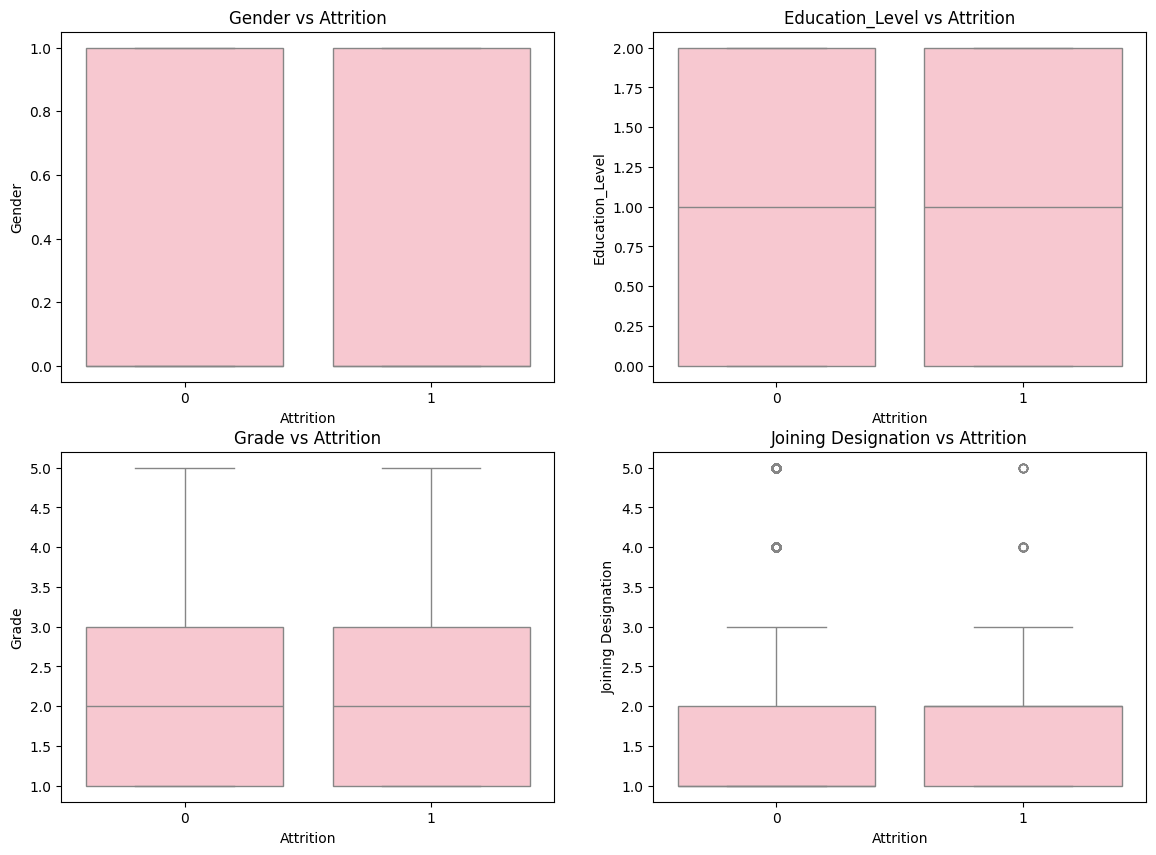

In [ ]:
plt.figure(figsize=(14,10))

for i, col in enumerate(categorical):
  plt.subplot(2,2,i+1)
  sns.boxplot(data=df, x='Attrition', y = col, color='pink')
  plt.title(f'{col} vs Attrition')
  plt.xlabel('Attrition')
  plt.ylabel(col)

plt.show()

**Insights:**

* Across the categorical features, no significant difference is observed between attrited and retained drivers.

**Correlation Heatmap:**

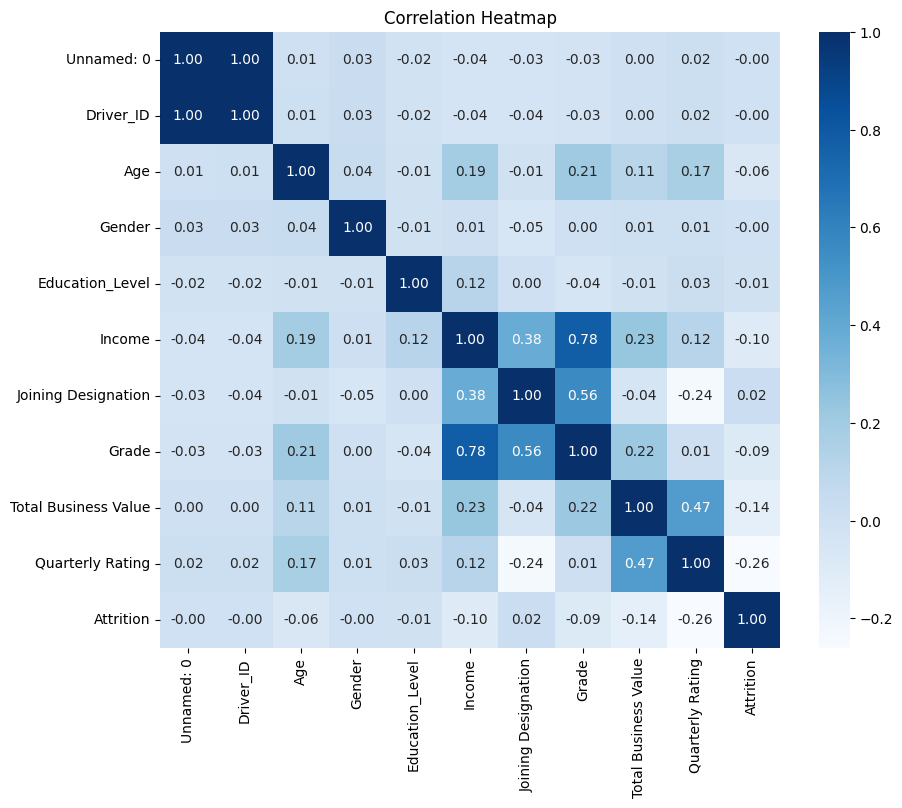

In [ ]:
num_df = df.select_dtypes(include='number')

corr_matrix = num_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Insights:**
* There is a negative correlation between Quarterly Rating and Attrition	(-0.26). This indicates	drivers with low ratings are more likely to leave.

* Income, while moderately correlated, still shows a trend that low pay increases attrition.

* Demographics such as gender, education are not predictive of attrition in this case.

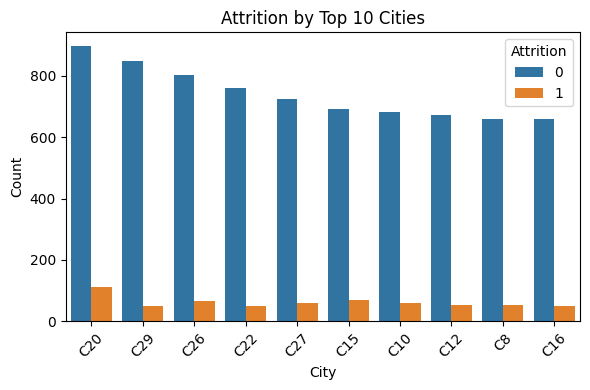

In [ ]:
top_cities = df['City'].value_counts().nlargest(10).index
plt.figure(figsize=(6, 4))
sns.countplot(data=df[df['City'].isin(top_cities)], x='City', hue='Attrition', order=top_cities)
plt.title("Attrition by Top 10 Cities")
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Data Preprocessing:**

In [ ]:
# Quarterly Rating Increase
df = df.sort_values(['Driver_ID', 'MMM-YY'])
df['prev_rating'] = df.groupby('Driver_ID')['Quarterly Rating'].shift(1)
df['quarterly_rating_increase'] = (df['Quarterly Rating']>df['prev_rating']).astype(int)

In [ ]:
# Monthly Income Increase
df['prev_income'] = df.groupby('Driver_ID')['Income'].shift(1)
df['monthly_income_increase'] = (df['Income']>df['prev_income']).astype(int)

In [ ]:
# K-NN Imputation
from sklearn.impute import KNNImputer

numeric_columns = df.select_dtypes(include=['int64','float64']).columns
knn_imputer = KNNImputer(n_neighbors=5)
df[numeric_columns] = knn_imputer.fit_transform(df[numeric_columns])


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 1: Drop datetime columns
datetime_cols = df.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns
df = df.drop(columns=datetime_cols)

X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Encode categorical columns before splitting
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

# One-hot encode 'City'
X = pd.get_dummies(X, columns=['City'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# SMOTE on training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


**Explanation:**
* Label Encoding: The Gender column is converted from text values (like 'Male', 'Female') to numerical labels (0 or 1) using LabelEncoder.
* One-Hot Encoding: The City column is converted into multiple columns (one for each city) with binary values (0 or 1) indicating the driver's city. This is called one-hot encoding and is used to represent categorical data without implying any order.

* SMOTE: Since there might be more drivers who stayed than those who left, SMOTE is used to generate synthetic samples for the minority class (attrition cases) to balance the dataset and improve model performance.

* StandardScaler: It is applied to scale the numerical features so they have zero mean and unit variance. This can help improve the performance of some machine learning algorithms that are sensitive to feature scaling.

### **Model Training:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc



**Random Forest:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=10,
    scoring='roc_auc',
    n_jobs=-1,
    cv=3,
    verbose=1,
    random_state=42
)

rf_random.fit(X_train_scaled, y_train_res)
best_rf = rf_random.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


**Steps Explained:**
1. Create Base Model: A Random Forest model is created with initial settings (random_state and class_weight).

2. Define Hyperparameter Grid: A range of values for important model settings (hyperparameters) is specified in a dictionary.

3. Set Up Hyperparameter Search: RandomizedSearchCV is configured to find the best hyperparameter combination using the defined grid, performance metric (ROC AUC), cross-validation and other settings.

4. Perform Search and Select Best Model: The search is executed on the training data and the best-performing model (with optimal hyperparameters) is stored.

**XGBoost:**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'scale_pos_weight': [3, 5, 10]  # adjust based on imbalance ratio
}

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    scoring='roc_auc',
    n_jobs=-1,
    cv=3,
    verbose=1,
    random_state=42
)

xgb_random.fit(X_train_scaled, y_train_res)

best_xgb = xgb_random.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:56:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**Steps Explained:**

1. Create an XGBoost classifier: An XGBClassifier object is initialized with specific settings for binary classification and performance evaluation using AUC (Area Under the Curve).


2. Define hyperparameter grid: A dictionary param_grid is created, containing a range of values for various XGBoost hyperparameters. These hyperparameters control the model's complexity and learning process.

3. Set up RandomizedSearchCV: RandomizedSearchCV is configured to find the best combination of hyperparameters from the param_grid. It samples thehyperparameter combinations randomly and evaluates them using cross-validation (cv=3) Subsequently, the combination that maximizes the ROC AUC score is selected.

4. Train and select the best model: The fit method is called on xgb_random to train the model with different hyperparameter combinations on the training data (X_train_scaled, y_train_res). The best-performing model is stored in the best_xgb variable.

**Evaluation Function:**

In [ ]:
def evaluate_model(name, y_test, y_pred, y_prob):
  print(f"\n--- {name} Evaluation ---")
  print('Classification Report: ')
  print(classification_report(y_test, y_pred))
  print('Confusion Matrix: ')
  print(confusion_matrix(y_test, y_pred))
  print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")


In [ ]:
y_pred_rf = best_rf.predict(X_test_scaled)
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:,1]

y_pred_xgb = best_xgb.predict(X_test_scaled)
y_prob_xgb = best_xgb.predict_proba(X_test_scaled)[:,1]

evaluate_model("Random Forest (Tuned)", y_test, y_pred_rf, y_prob_rf)
evaluate_model("XGBoost (Tuned)", y_test, y_pred_xgb, y_prob_xgb)



--- Random Forest (Tuned) Evaluation ---
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      3498
         1.0       0.17      0.12      0.14       323

    accuracy                           0.88      3821
   macro avg       0.55      0.53      0.54      3821
weighted avg       0.86      0.88      0.87      3821

Confusion Matrix: 
[[3309  189]
 [ 284   39]]
ROC AUC Score: 0.8056

--- XGBoost (Tuned) Evaluation ---
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.89      3498
         1.0       0.22      0.48      0.31       323

    accuracy                           0.82      3821
   macro avg       0.59      0.66      0.60      3821
weighted avg       0.89      0.82      0.84      3821

Confusion Matrix: 
[[2961  537]
 [ 168  155]]
ROC AUC Score: 0.8057


**Explanation:**
* This code segment uses the best performing Random Forest and XGBoost models to predict driver attrition (both as a binary outcome and probability) on unseen test data. It then evaluates the performance of both models using the evaluate_model function, which calculates and displays key metrics like classification report, confusion matrix and ROC AUC score, enabling a comprehensive performance comparison.

**ROC-AUC Curve:**

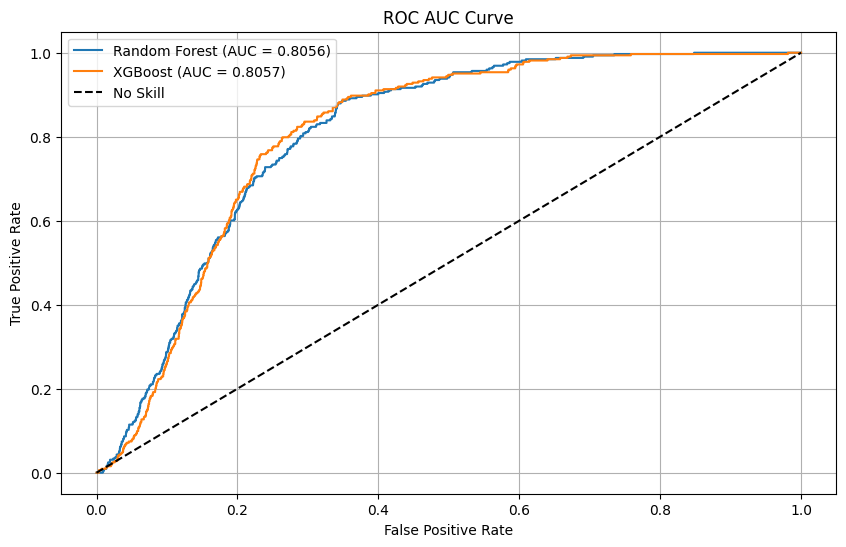

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc(fpr_xgb, tpr_xgb):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.grid(True)
plt.show()

**Insights:**
* Random Forest:
 *  A high overall accuracy of 88% is obtained which is driven by strong performance on majority class (non-attrition).

 * However, a poor recall for attrition class (12%) indicates that the model fails to detect most drivers who are likely to leave.

 * Low precision (17%) on attrition means many false alarms.

 * Despite high accuracy, the model’s AUC of 0.8056 suggests limited ability to distinguish attrition cases from non-attrition.

* XGBoost:
 * Although the accuracy obtained is 82% the model offers balanced performance across classes as there is better minority class detection.

 * A moderate recall of 48% is obtained for attrition, catching nearly half of the leavers.

 * However, the precision is low (22%), implying the possible presence of false positives.

 * An AUC of 0.8057 indicates solid predictive capability and better class separation than the previous model.

**Maximizing attrition recall efficiency by using Stratified K-Fold XGBoost:**

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:38:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


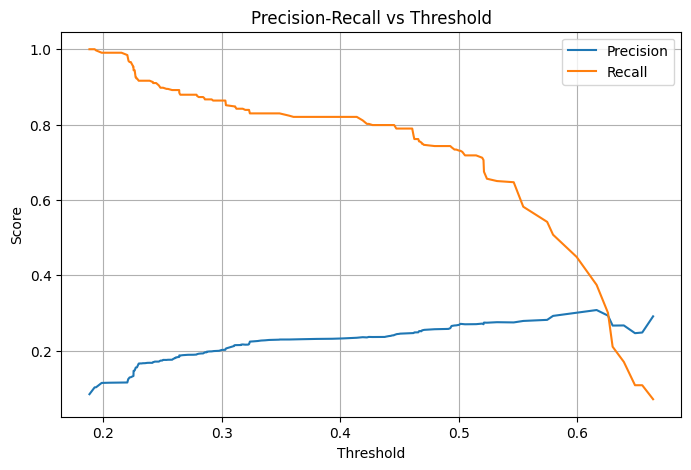


--- Final XGBoost Evaluation ---
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.69      0.81      3498
         1.0       0.20      0.86      0.33       323

    accuracy                           0.70      3821
   macro avg       0.59      0.77      0.57      3821
weighted avg       0.92      0.70      0.77      3821

Confusion Matrix:
 [[2397 1101]
 [  44  279]]
ROC AUC Score: 0.8371249736691643


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

xgb = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=(len(y_train_res) - sum(y_train_res)) / sum(y_train_res),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='recall',  # Focus on recall for class 1
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train_res)
best_xgb = grid_search.best_estimator_

y_prob = best_xgb.predict_proba(X_test_scaled)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Plot precision-recall vs threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

# Select a threshold that balances both (example: recall ≥ 0.3, precision ≥ 0.2)
threshold = 0.3
y_pred_adjusted = (y_prob >= threshold).astype(int)

print("\n--- Final XGBoost Evaluation ---")
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


**Insights:**

* The model now achieves very high recall (0.86) for the attrition class, meaning it correctly identifies most drivers who are likely to leave.

* However, precision (0.20) is low, indicating many non-attrition drivers are falsely predicted as leaving.

* Overall accuracy dropped to 70%, but this trade-off is acceptable here, as identifying potential attrition is the top priority.

* An ROC-AUC score of 0.837 suggests strong overall class separation, despite the class imbalance.

### **Actionable Insights and Recommendations:**

* **Brief Explanation of Performance Metrics in Classification Report:**

 * ROC-AUC Score: The ROC AUC score measures the model's ability to distinguish between classes (drivers leaving vs. staying). A higher AUC score indicates better discriminatory power, meaning the model is better at correctly ranking drivers in terms of their risk of attrition.

 *  Precision: "Of all the drivers we predicted as attrition, how many truly left?"

   * Precision= True Positives/(True Positives + False Positives)
   * High precision indicates few false positives, indicating, no wrong classification of non-attrition drivers when attrition happens.
 * Recall: "Of all the drivers who actually left, how many did we correctly predict?"
   * Recall= True Positives/(False Negatives+True Positives)
   * High recall means few false negatives, suggesting drivers who are actually going to leave were rightly identified.

 * F1-Score: The harmonic mean of precision and recall, providing a balance between the two.
   * A balanced F1-score indicates that the model strikes a good balance between precision and recall.

The model is effective at identifying most drivers who are at risk of leaving, even if it also misclassifies some loyal drivers.
This recall-focused model can serve as an early warning system to flag potentially at-risk drivers.

* Factors contributing heavily to predictions likely include:

  * Low monthly income
  * Reduced business acquisition
  * Lower quarterly ratings or driver grades
  * Short tenure


* **Recommendations to minimize Attrition:**

  * **Income Assurance Programs**:
   Consider increasing incomes  for drivers in lower-income brackets or those showing declining income trends.
  * **Personalized Engagement**:
Gather qualitative feedback from drivers flagged as high-risk. This would address any possible concerns they may have.
  * **Training & Upskilling**:
Provide training opportunities for drivers with poor ratings or low business acquisition.
  * **Attrition Dashboard**:
Deploy the model in production to continuously monitor at-risk drivers.
  * **Accident Insurance and Competitor Analysis**:
Provide accident insurance and safety training, particularly for long-tenured drivers to ensure their overall well-being. Regularly compare Ola’s driver benefits, support structures and earnings with competitors (like Uber or Rapido) and adjust policies accordingly.
 * **Driver Exit Interviews and Feedback Loop**:
Collect and analyze feedback from attrited drivers. Ensure to feed it into the model for refinement and operational changes.

By integrating this predictive model with Ola's driver management system, the company can minimize churn, improve operational stability,
while enhancing driver satisfaction and optimizing incentive costs.